In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
df=pd.read_csv('Home_loan_train.csv')

In [5]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
145930,269203,0,Cash loans,M,Y,Y,0,585000.0,1113840.0,47322.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
129559,250269,1,Cash loans,F,N,Y,0,103500.0,284400.0,22468.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
172452,299832,0,Cash loans,M,Y,Y,2,180000.0,450000.0,23692.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
285521,430681,0,Cash loans,F,Y,N,0,135000.0,540000.0,42664.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0
28177,132748,0,Cash loans,F,N,Y,2,225000.0,419679.0,20542.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0


In [6]:
df_x=df.iloc[:,1:]

In [7]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


In [8]:
df_x_num=df_x.select_dtypes(exclude=['object'])

In [9]:
df_x_num_col=df_x_num.columns.tolist()

<AxesSubplot:>

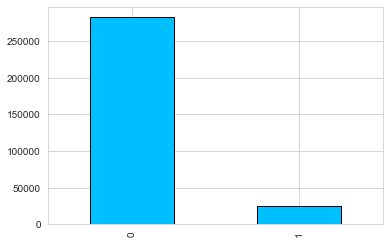

In [10]:
df_x_num['TARGET'].value_counts().plot(kind='bar',color='deepskyblue',edgecolor='black')

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
thr=VarianceThreshold(threshold=0.05)

In [13]:
thr.fit(df_x_num)

VarianceThreshold(threshold=0.05)

In [14]:
high_var=df_x_num.columns[thr.get_support()].tolist()

In [15]:
df_x_num=df_x_num[high_var]

In [16]:
df_x_num.sample(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
70834,0,0,202500.0,808650.0,22365.0,675000.0,-10486,-1456,-4192.0,-3166,...,0.0,0.0,0.0,-380.0,1,0,0,0.0,2.0,1.0
244247,1,0,450000.0,1506816.0,49927.5,1350000.0,-17219,-986,-9156.0,-766,...,0.0,0.0,0.0,-2857.0,1,0,0,0.0,1.0,3.0
67405,0,2,157500.0,675000.0,24930.0,675000.0,-12498,-5903,-1001.0,-3354,...,1.0,5.0,1.0,0.0,1,0,0,0.0,0.0,3.0
100142,0,0,225000.0,497520.0,33376.5,450000.0,-11851,-564,-3369.0,-2920,...,0.0,0.0,0.0,0.0,1,0,0,1.0,0.0,1.0
87432,0,0,202500.0,450000.0,53536.5,450000.0,-10051,-902,-3067.0,-1241,...,0.0,0.0,0.0,-740.0,0,0,0,0.0,0.0,1.0


In [17]:
df_x_num.shape

(307511, 33)

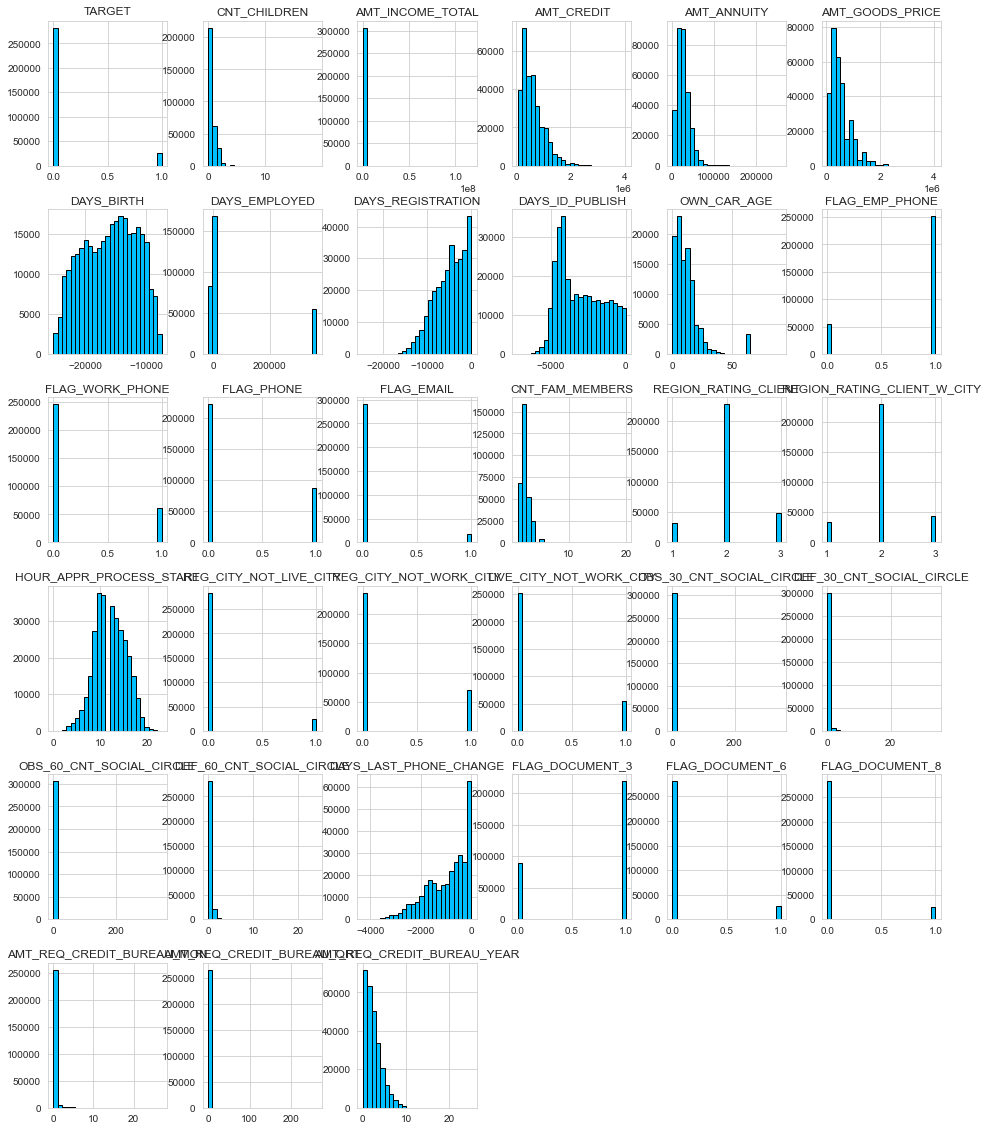

In [18]:
fig=df_x_num.hist(figsize=(16,20),bins=25,color='deepskyblue',edgecolor='black')

In [19]:
df_x_num=df_x_num.drop(columns=['OWN_CAR_AGE'])

In [20]:
col=df_x_num.columns[df_x_num.isnull().sum()>0].tolist()

In [21]:
col

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [22]:
temp=pd.DataFrame(df_x_num.isnull().mean()*100).reset_index()

In [23]:
temp

,index,0
0,TARGET,0.000000
1,CNT_CHILDREN,0.000000
2,AMT_INCOME_TOTAL,0.000000
3,AMT_CREDIT,0.000000
4,AMT_ANNUITY,0.003902
5,AMT_GOODS_PRICE,0.090403
6,DAYS_BIRTH,0.000000
7,DAYS_EMPLOYED,0.000000
8,DAYS_REGISTRATION,0.000000
9,DAYS_ID_PUBLISH,0.000000


In [24]:
temp.columns=['columns','Nan']

In [25]:
temp

,columns,Nan
0,TARGET,0.000000
1,CNT_CHILDREN,0.000000
2,AMT_INCOME_TOTAL,0.000000
3,AMT_CREDIT,0.000000
4,AMT_ANNUITY,0.003902
5,AMT_GOODS_PRICE,0.090403
6,DAYS_BIRTH,0.000000
7,DAYS_EMPLOYED,0.000000
8,DAYS_REGISTRATION,0.000000
9,DAYS_ID_PUBLISH,0.000000


In [26]:
nan_index=temp[temp['Nan']>0].index.tolist()

In [27]:
df_num_nan=temp.iloc[nan_index].sort_values('Nan',ascending=False)

In [28]:
df_num_nan=df_num_nan.set_index('columns')

<AxesSubplot:xlabel='columns'>

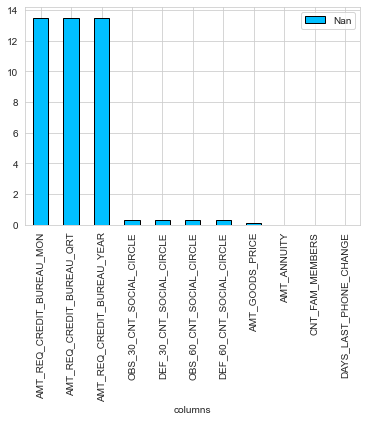

In [29]:
df_num_nan.plot(kind='bar',color='deepskyblue',edgecolor='black')

In [30]:
df_num_nan=df_num_nan.reset_index()

In [31]:
df_x_num['AMT_REQ_CREDIT_BUREAU_MON_impute']=df_x_num['AMT_REQ_CREDIT_BUREAU_MON']
df_x_num['AMT_REQ_CREDIT_BUREAU_QRT_impute']=df_x_num['AMT_REQ_CREDIT_BUREAU_QRT']
df_x_num['AMT_REQ_CREDIT_BUREAU_YEAR_impute']=df_x_num['AMT_REQ_CREDIT_BUREAU_YEAR']
df_x_num['OBS_30_CNT_SOCIAL_CIRCLE_impute']=df_x_num['OBS_30_CNT_SOCIAL_CIRCLE']
df_x_num['DEF_30_CNT_SOCIAL_CIRCLE_impute']=df_x_num['DEF_30_CNT_SOCIAL_CIRCLE']
df_x_num['OBS_60_CNT_SOCIAL_CIRCLE_impute']=df_x_num['OBS_60_CNT_SOCIAL_CIRCLE']
df_x_num['DEF_60_CNT_SOCIAL_CIRCLE_impute']=df_x_num['DEF_60_CNT_SOCIAL_CIRCLE']
df_x_num['AMT_GOODS_PRICE_impute']=df_x_num['AMT_GOODS_PRICE']
df_x_num['AMT_ANNUITY_impute']=df_x_num['AMT_ANNUITY']
df_x_num['CNT_FAM_MEMBERS_impute']=df_x_num['CNT_FAM_MEMBERS']
df_x_num['DAYS_LAST_PHONE_CHANGE_impute']=df_x_num['DAYS_LAST_PHONE_CHANGE']

In [32]:
df_x_num['AMT_REQ_CREDIT_BUREAU_MON_impute'].shape,df_x_num['AMT_REQ_CREDIT_BUREAU_MON'].shape

((307511,), (307511,))

In [33]:
nan_col=df_num_nan['columns'].tolist()

In [34]:
nan_col

['AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [35]:
nan_col_impute=[i+"_impute" for i in nan_col]

In [36]:
nan_col_impute

['AMT_REQ_CREDIT_BUREAU_MON_impute',
 'AMT_REQ_CREDIT_BUREAU_QRT_impute',
 'AMT_REQ_CREDIT_BUREAU_YEAR_impute',
 'OBS_30_CNT_SOCIAL_CIRCLE_impute',
 'DEF_30_CNT_SOCIAL_CIRCLE_impute',
 'OBS_60_CNT_SOCIAL_CIRCLE_impute',
 'DEF_60_CNT_SOCIAL_CIRCLE_impute',
 'AMT_GOODS_PRICE_impute',
 'AMT_ANNUITY_impute',
 'CNT_FAM_MEMBERS_impute',
 'DAYS_LAST_PHONE_CHANGE_impute']

In [37]:
l=list(zip(nan_col,nan_col_impute))

In [38]:
def fill_nan(col_impute,col,df):
    df[col_impute][df[col_impute].isnull()]=df[col].dropna().sample(df[col].isnull().sum()).values
    return df[col_impute]

In [39]:
for i in range(len(l)):
    fill_nan(l[i][1],l[i][0],df_x_num)
    print(l[i][1],":",df_x_num[l[i][1]].isnull().sum())

AMT_REQ_CREDIT_BUREAU_MON_impute : 0
AMT_REQ_CREDIT_BUREAU_QRT_impute : 0
AMT_REQ_CREDIT_BUREAU_YEAR_impute : 0
OBS_30_CNT_SOCIAL_CIRCLE_impute : 0
DEF_30_CNT_SOCIAL_CIRCLE_impute : 0
OBS_60_CNT_SOCIAL_CIRCLE_impute : 0
DEF_60_CNT_SOCIAL_CIRCLE_impute : 0
AMT_GOODS_PRICE_impute : 0
AMT_ANNUITY_impute : 0
CNT_FAM_MEMBERS_impute : 0
DAYS_LAST_PHONE_CHANGE_impute : 0


In [40]:
def kde_plot(df,col_impute,col):   
    fig=plt.figure(figsize=[18,8])
    ax=fig.add_subplot(111)
    df[col].plot(kind='kde',ax=ax,color='blue')
    df[col_impute].plot(kind='kde',ax=ax,color='orange')
    lines,labels=ax.get_legend_handles_labels()
    labels = [col, col_impute]
    ax.legend(lines,labels,loc='best')
    plt.show()

In [41]:
#for i in range(len(l)):
    
    #kde_plot(df=df_x_num,col_impute=l[i][1],col=l[i][0])

In [42]:
df_x_cat=df_x.select_dtypes(include='object')

In [43]:
df_x_cat.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [44]:
df_x_cat.isnull().mean()*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            68.386172
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
EMERGENCYSTATE_MODE           47.398304
dtype: float64

In [45]:
cat_nan_col=df_x_cat.columns[df_x_cat.isnull().mean()*100>32]

In [46]:
df_x_cat=df_x_cat.drop(columns=cat_nan_col)

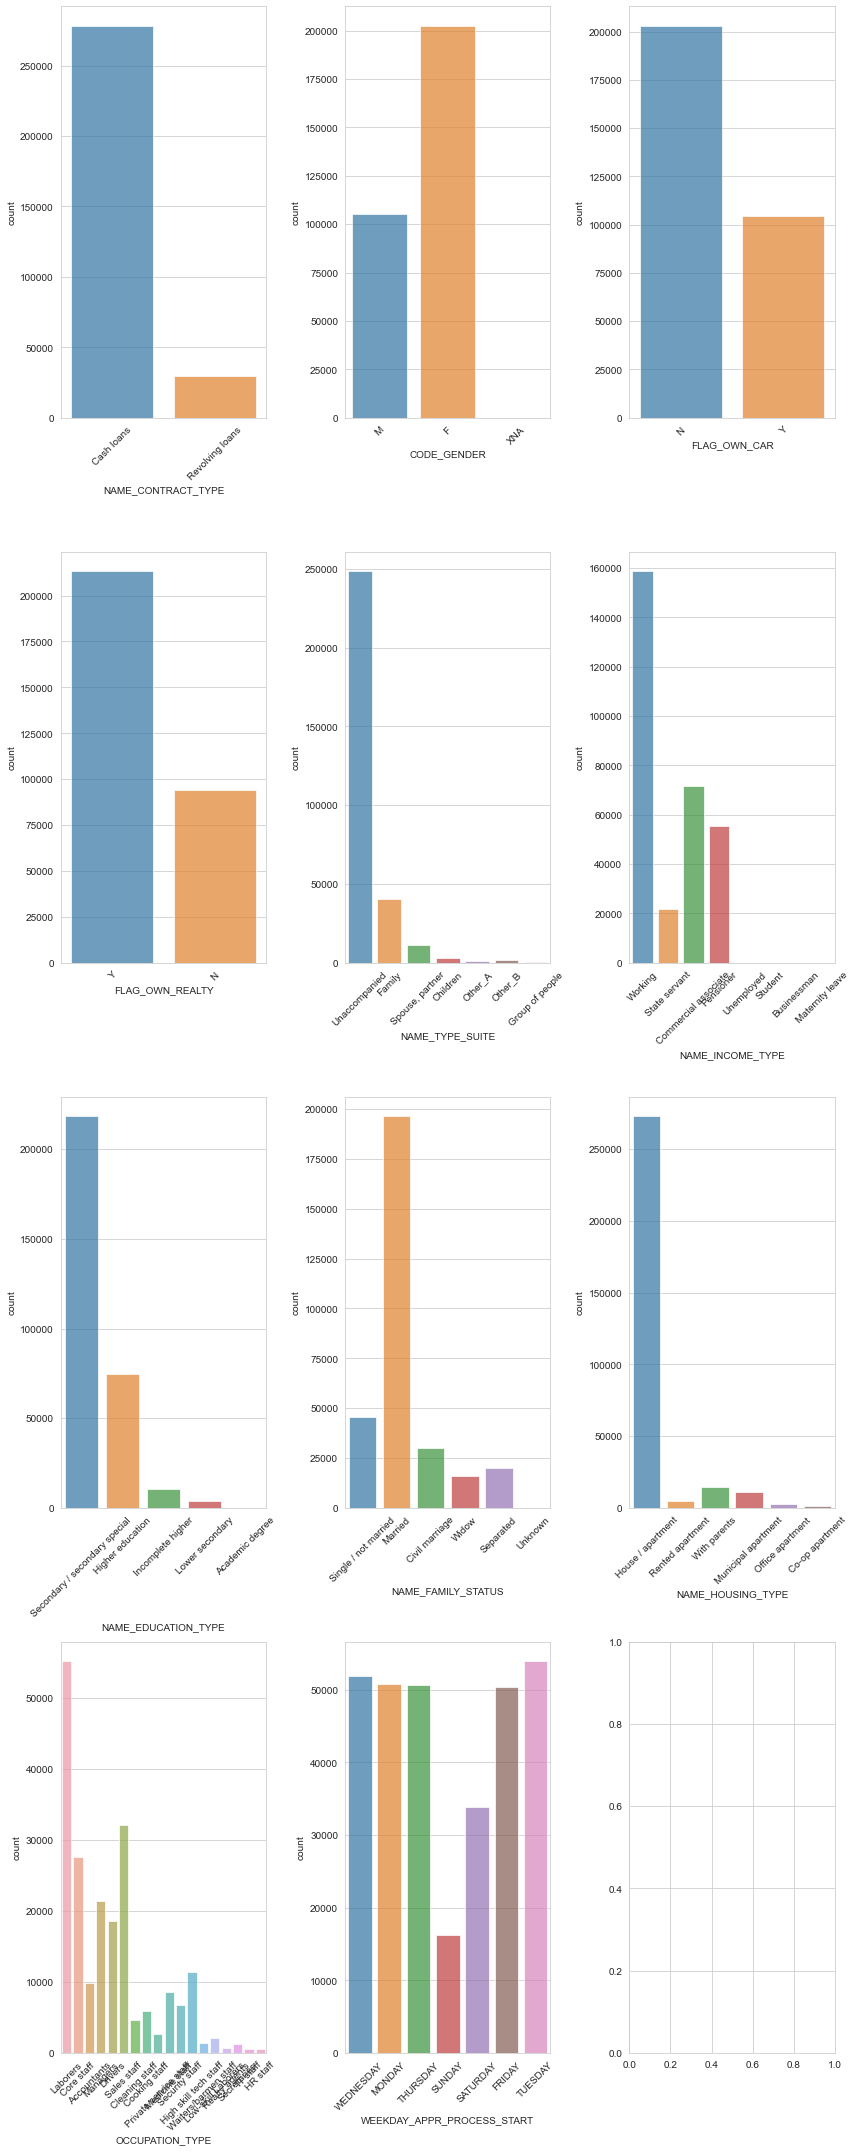

In [47]:
fig, axes = plt.subplots(
    round(len(df_x_cat.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_x_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_x_cat.columns[i], alpha=0.7, data=df_x_cat, ax=ax)

fig.tight_layout()

In [48]:
a=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

In [49]:
df_x_cat=df_x_cat.drop(columns=a)

In [50]:
cat_col=df_x_cat.columns.tolist()

In [51]:
df_x_cat.sample(5)

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
123949,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,High skill tech staff,WEDNESDAY,Self-employed
243351,Family,Working,Secondary / secondary special,Married,House / apartment,Cleaning staff,SUNDAY,Business Entity Type 3
43768,Unaccompanied,Commercial associate,Secondary / secondary special,Separated,House / apartment,Laborers,WEDNESDAY,Business Entity Type 2
153597,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Drivers,MONDAY,Self-employed
300163,Family,Working,Secondary / secondary special,Married,House / apartment,Managers,THURSDAY,Construction


In [52]:
df_x_cat['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [53]:
nan_cat=df_x_cat.columns[df_x_cat.isnull().sum()>0].tolist()

In [54]:
nan_cat_impute=[i+'_impute' for i in nan_cat]
nan_cat_impute

['NAME_TYPE_SUITE_impute', 'OCCUPATION_TYPE_impute']

In [55]:
nan_lst=list(zip(nan_cat_impute,nan_cat))

In [56]:
df_x_cat.head()

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [57]:
nan_cat_impute

['NAME_TYPE_SUITE_impute', 'OCCUPATION_TYPE_impute']

In [58]:
nan_cat_impute=df_x_cat.columns[df_x_cat.isnull().mean()*100>32].tolist()

In [59]:
for i in range(len(nan_cat_impute)):
    df_x_cat[nan_cat_impute[i]]=df_x_cat[nan_cat[i]]

In [60]:
def fill_nan(col_impute,col,df):
    df[col_impute][df[col_impute].isnull()]=df[col].dropna().sample(df[col].isnull().sum()).values
    return df[col_impute]

In [61]:
df_x_cat.isnull().mean()*100

NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

In [62]:
df_x_cat['NAME_TYPE_SUITE_impute']=df_x_cat['NAME_TYPE_SUITE']


In [63]:
nan_cat=df_x_cat.columns[df_x_cat.isnull().sum()>0].tolist()

In [64]:
for i in nan_cat:
    df_x_cat[i+'_impute']=df_x_cat[i]

In [65]:
df_x_cat.isnull().mean()

NAME_TYPE_SUITE                  0.004201
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
OCCUPATION_TYPE                  0.313455
WEEKDAY_APPR_PROCESS_START       0.000000
ORGANIZATION_TYPE                0.000000
NAME_TYPE_SUITE_impute           0.004201
OCCUPATION_TYPE_impute           0.313455
NAME_TYPE_SUITE_impute_impute    0.004201
dtype: float64

In [66]:
def fill_nan(col_impute,col,df):
    df[col_impute][df[col_impute].isnull()]=df[col].dropna().sample(df[col].isnull().sum()).values
    return df[col_impute]

In [67]:
df_x_cat['NAME_TYPE_SUITE_impute']=fill_nan('NAME_TYPE_SUITE_impute','NAME_TYPE_SUITE',df_x_cat)

In [68]:
df_x_cat.isnull().sum()

NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
OCCUPATION_TYPE                  96391
WEEKDAY_APPR_PROCESS_START           0
ORGANIZATION_TYPE                    0
NAME_TYPE_SUITE_impute               0
OCCUPATION_TYPE_impute           96391
NAME_TYPE_SUITE_impute_impute     1292
dtype: int64

In [69]:
df_x_cat['OCCUPATION_TYPE_impute']=fill_nan('OCCUPATION_TYPE_impute','OCCUPATION_TYPE',df_x_cat)

In [70]:
def violin_plot(col_impute,col):
  labels=df_x_cat[col_impute].unique().tolist()
  plt.figure(figsize=(20,20))
  fig, (ax1, ax2) = plt.subplots(1, 2)
  sns.violinplot(x=df_x_cat[col_impute],y=df_x_num['TARGET'],ax=ax1)
  sns.violinplot(x=df_x_cat[col],y=df_x_num['TARGET'],ax=ax2)
  ax1.set_xticklabels(labels,rotation=45)
  ax2.set_xticklabels(labels,rotation=45)
  fig.tight_layout()
  plt.show()

<Figure size 1440x1440 with 0 Axes>

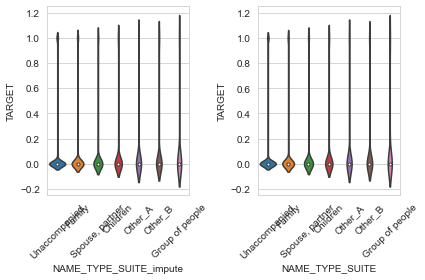

In [71]:
violin_plot('NAME_TYPE_SUITE_impute','NAME_TYPE_SUITE')

<Figure size 1440x1440 with 0 Axes>

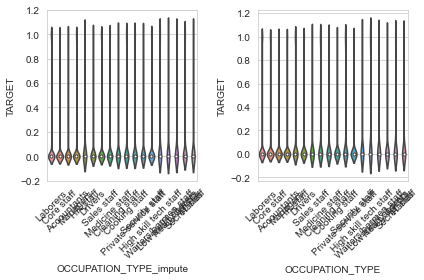

In [72]:
violin_plot('OCCUPATION_TYPE_impute','OCCUPATION_TYPE')

In [73]:
x=df_x_cat.dropna()

In [74]:
df_x_cat=df_x_cat.drop(columns=['NAME_TYPE_SUITE','OCCUPATION_TYPE','NAME_TYPE_SUITE_impute_impute'])

In [75]:
df_x_cat=df_x_cat.rename(columns={'OCCUPATION_TYPE_impute':'OCCUPATION_TYPE','NAME_TYPE_SUITE_impute':'NAME_TYPE_SUITE'})

In [76]:
df_x_cat.head()

,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE
0,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3,Unaccompanied,Laborers
1,State servant,Higher education,Married,House / apartment,MONDAY,School,Family,Core staff
2,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government,Unaccompanied,Laborers
3,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3,Unaccompanied,Laborers
4,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion,Unaccompanied,Core staff


In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
ohe=OneHotEncoder(sparse=False,dtype=np.int32,drop='first')

In [79]:
df_x_cat=pd.DataFrame(ohe.fit_transform(df_x_cat))

In [80]:
df_x_cat

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
307507,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
307508,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
307509,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
num_nan_lst=df_x_num.columns[df_x_num.isnull().sum()>0]

In [82]:
df_x_num=df_x_num.drop(columns=num_nan_lst)

In [83]:
df_x_num.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'AMT_REQ_CREDIT_BUREAU_MON_impute', 'AMT_REQ_CREDIT_BUREAU_QRT_impute',
       'AMT_REQ_CREDIT_BUREAU_YEAR_impute', 'OBS_30_CNT_SOCIAL_CIRCLE_impute',
       'DEF_30_CNT_SOCIAL_CIRCLE_impute', 'OBS_60_CNT_SOCIAL_CIRCLE_impute',
       'DEF_60_CNT_SOCIAL_CIRCLE_impute', 'AMT_GOODS_PRICE_impute',
       'AMT_ANNUITY_impute', 'CNT_FAM_MEMBERS_impute',
       'DAYS_LAST_PHONE_CHANGE_impute'],
      dtype='object')

In [84]:
impute_lst=['AMT_REQ_CREDIT_BUREAU_MON_impute', 'AMT_REQ_CREDIT_BUREAU_QRT_impute',
       'AMT_REQ_CREDIT_BUREAU_YEAR_impute', 'OBS_30_CNT_SOCIAL_CIRCLE_impute',
       'DEF_30_CNT_SOCIAL_CIRCLE_impute', 'OBS_60_CNT_SOCIAL_CIRCLE_impute',
       'DEF_60_CNT_SOCIAL_CIRCLE_impute', 'AMT_GOODS_PRICE_impute',
       'AMT_ANNUITY_impute', 'CNT_FAM_MEMBERS_impute',
       'DAYS_LAST_PHONE_CHANGE_impute']

In [85]:
for i in df_x_num.columns:
    if i in impute_lst:
        df_x_num=df_x_num.rename(columns={i:"_".join(i.split('_')[:-1])})

In [86]:
df_x_num.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [87]:
len(df_x_num.columns[df_x_num.isnull().sum()>0])

0

In [88]:
len(df_x_cat.columns[df_x_cat.isnull().sum()>0])

0

In [89]:
df_x_float=df_x.select_dtypes(include='float')

In [90]:
df_x_float.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
flt_nan_lst=df_x_float.columns[df_x_float.isnull().any()].tolist()

<AxesSubplot:>

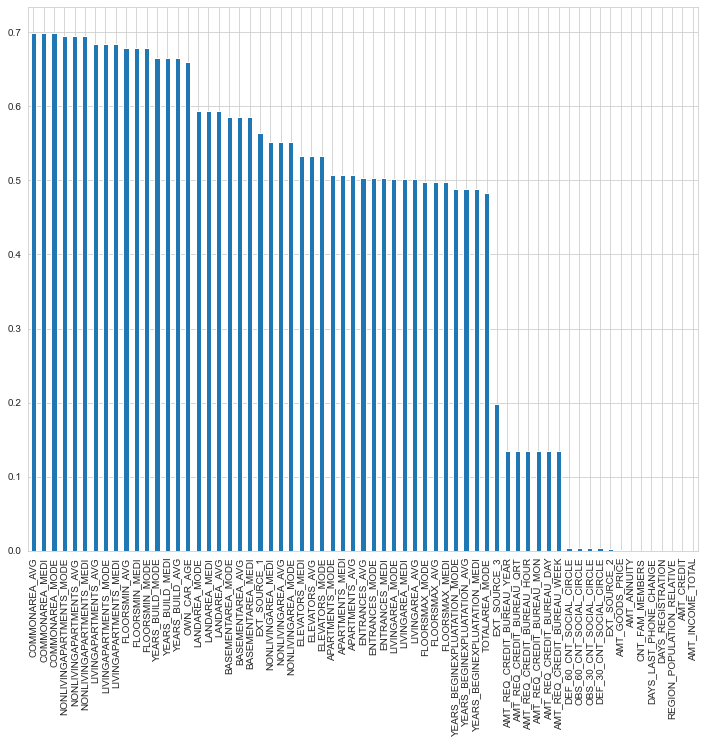

In [92]:
fig, ax = plt.subplots(figsize=(12, 10))
df_x_float.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [93]:
lst=df_x_float.columns[df_x_float.isnull().mean()>0.25].tolist()

In [94]:
len(lst)

45

In [95]:
df_x_float=df_x_float.drop(columns=lst)

In [96]:
lst_nan_flt=df_x_float.columns[df_x_float.isnull().mean()>0].tolist()

In [97]:
for i in lst_nan_flt:
    df_x_float[i+'_impute']=df_x_float[i]

In [98]:
lst=df_x_float.columns[df_x_float.isnull().mean().values==0].tolist()
lst

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION']

In [99]:
lst_nan_flt

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [100]:
flt_lst=df_x_float.columns[df_x_float.isnull().sum()>0].tolist()

In [101]:
flt_lst_nan=[]
for i in flt_lst:
    if df_x_float[i].isnull().sum()>0:
        flt_lst_nan.append(i)

In [102]:
flt_lst_nan

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_impute',
 'AMT_GOODS_PRICE_impute',
 'CNT_FAM_MEMBERS_impute',
 'EXT_SOURCE_2_impute',
 'EXT_SOURCE_3_impute',
 'OBS_30_CNT_SOCIAL_CIRCLE_impute',
 'DEF_30_CNT_SOCIAL_CIRCLE_impute',
 'OBS_60_CNT_SOCIAL_CIRCLE_impute',
 'DEF_60_CNT_SOCIAL_CIRCLE_impute',
 'DAYS_LAST_PHONE_CHANGE_impute',
 'AMT_REQ_CREDIT_BUREAU_HOUR_impute',
 'AMT_REQ_CREDIT_BUREAU_DAY_impute',
 'AMT_REQ_CREDIT_BUREAU_WEEK_impute',
 'AMT_REQ_CREDIT_BUREAU_MON_impute',
 'AMT_REQ_CREDIT_BUREAU_QRT_impute',
 'AMT_REQ_CREDIT_BUREAU_YEAR_impute']

In [103]:
df_x_float['AMT_ANNUITY'].isnull().sum()

12

In [104]:
len(flt_lst_nan)

32

In [105]:
flt_lst_nan[16]

'AMT_ANNUITY_impute'

In [106]:
for i in range(round(len(flt_lst_nan)/2)):
    print(flt_lst_nan[i+16])
    flt_lst_nan[i+16]=fill_nan(flt_lst_nan[i+16],flt_lst_nan[i],df_x_float)

AMT_ANNUITY_impute
AMT_GOODS_PRICE_impute
CNT_FAM_MEMBERS_impute
EXT_SOURCE_2_impute
EXT_SOURCE_3_impute
OBS_30_CNT_SOCIAL_CIRCLE_impute
DEF_30_CNT_SOCIAL_CIRCLE_impute
OBS_60_CNT_SOCIAL_CIRCLE_impute
DEF_60_CNT_SOCIAL_CIRCLE_impute
DAYS_LAST_PHONE_CHANGE_impute
AMT_REQ_CREDIT_BUREAU_HOUR_impute
AMT_REQ_CREDIT_BUREAU_DAY_impute
AMT_REQ_CREDIT_BUREAU_WEEK_impute
AMT_REQ_CREDIT_BUREAU_MON_impute
AMT_REQ_CREDIT_BUREAU_QRT_impute
AMT_REQ_CREDIT_BUREAU_YEAR_impute


In [107]:
df_x_float.isnull().sum()

AMT_INCOME_TOTAL                         0
AMT_CREDIT                               0
AMT_ANNUITY                             12
AMT_GOODS_PRICE                        278
REGION_POPULATION_RELATIVE               0
DAYS_REGISTRATION                        0
CNT_FAM_MEMBERS                          2
EXT_SOURCE_2                           660
EXT_SOURCE_3                         60965
OBS_30_CNT_SOCIAL_CIRCLE              1021
DEF_30_CNT_SOCIAL_CIRCLE              1021
OBS_60_CNT_SOCIAL_CIRCLE              1021
DEF_60_CNT_SOCIAL_CIRCLE              1021
DAYS_LAST_PHONE_CHANGE                   1
AMT_REQ_CREDIT_BUREAU_HOUR           41519
AMT_REQ_CREDIT_BUREAU_DAY            41519
AMT_REQ_CREDIT_BUREAU_WEEK           41519
AMT_REQ_CREDIT_BUREAU_MON            41519
AMT_REQ_CREDIT_BUREAU_QRT            41519
AMT_REQ_CREDIT_BUREAU_YEAR           41519
AMT_ANNUITY_impute                       0
AMT_GOODS_PRICE_impute                   0
CNT_FAM_MEMBERS_impute                   0
EXT_SOURCE_

In [108]:
df_x_float=df_x_float.drop(columns=lst_nan_flt)

In [109]:
df_x_float.isnull().sum()

AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
REGION_POPULATION_RELATIVE           0
DAYS_REGISTRATION                    0
AMT_ANNUITY_impute                   0
AMT_GOODS_PRICE_impute               0
CNT_FAM_MEMBERS_impute               0
EXT_SOURCE_2_impute                  0
EXT_SOURCE_3_impute                  0
OBS_30_CNT_SOCIAL_CIRCLE_impute      0
DEF_30_CNT_SOCIAL_CIRCLE_impute      0
OBS_60_CNT_SOCIAL_CIRCLE_impute      0
DEF_60_CNT_SOCIAL_CIRCLE_impute      0
DAYS_LAST_PHONE_CHANGE_impute        0
AMT_REQ_CREDIT_BUREAU_HOUR_impute    0
AMT_REQ_CREDIT_BUREAU_DAY_impute     0
AMT_REQ_CREDIT_BUREAU_WEEK_impute    0
AMT_REQ_CREDIT_BUREAU_MON_impute     0
AMT_REQ_CREDIT_BUREAU_QRT_impute     0
AMT_REQ_CREDIT_BUREAU_YEAR_impute    0
dtype: int64

In [110]:
flt_lst=df_x_float.columns.tolist()

In [111]:
for i in flt_lst:
    if i.split('_')[-1]=='impute':
        df_x_float=df_x_float.rename(columns={i:"_".join(i.split('_')[:-1])})

In [112]:
df_x_float.columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [113]:
l=[]
for i in df_x_num.columns.tolist():
    if i in df_x_float.columns.tolist():
        l.append(i)

In [114]:
df_x_float=df_x_float.drop(columns=l)

In [115]:
df_x=df_x_num.join(df_x_float)

In [116]:
df_x=df_x.join(df_x_cat)

In [117]:
corr=df_x.corr()['TARGET']

In [118]:
low_feat=corr[(corr>-0.05) & (corr<0.05)]
low_feat.index.tolist()

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'REGION_POPULATION_RELATIVE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 0,
 1,
 2,
 3,
 4,
 5,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 6

In [119]:
df_x=df_x.drop(columns=low_feat.index.tolist())

In [120]:
df_x.shape

(307511, 11)

In [121]:
corr=df_x.corr()['TARGET']

In [122]:
mask = np.triu(np.ones_like(df_x.corr(), dtype=bool))

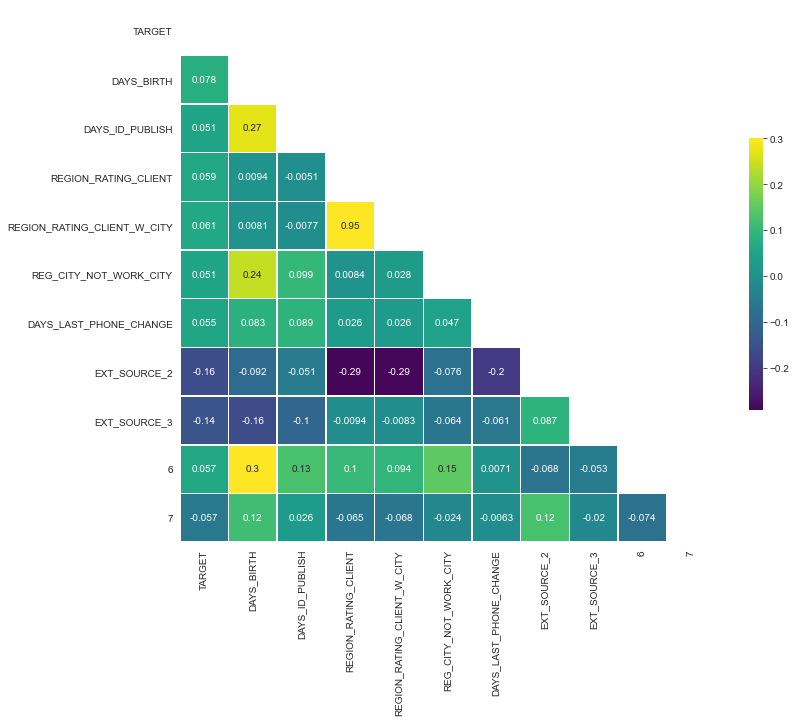

In [123]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_x.corr(), mask=mask, cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()

In [124]:
x=df_x.drop(columns=['TARGET'])

In [125]:
y=df_x['TARGET']

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [128]:
x_train.shape,x_test.shape

((230633, 10), (76878, 10))

In [129]:
y_train.shape,y_test.shape

((230633,), (76878,))

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier

In [131]:
dt=DecisionTreeClassifier()

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scale=StandardScaler()

In [134]:
x_train=scale.fit_transform(x_train)

In [135]:
x_test=scale.transform(x_test)

In [136]:
x_train=pd.DataFrame(x_train,columns=x.columns)

In [137]:
x_test=pd.DataFrame(x_test,columns=x.columns)

In [138]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (230633, 10)
x_test shape: (76878, 10)
y_train shape: (230633,)
y_test shape: (76878,)


In [139]:
x_train.isnull().sum().sum(),x_test.isnull().sum().sum()

(0, 0)

In [140]:
y_train.isnull().sum().sum(),y_test.isnull().sum().sum()

(0, 0)

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
vif=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [143]:
col=x_train.columns

In [144]:
vif=pd.DataFrame(vif)

In [145]:
vif['col']=col

In [146]:
vif=vif.rename(columns={0:'VIF FACTOR'})

In [147]:
vif

,VIF FACTOR,col
0,1.277559,DAYS_BIRTH
1,1.094012,DAYS_ID_PUBLISH
2,10.576688,REGION_RATING_CLIENT
3,10.525190,REGION_RATING_CLIENT_W_CITY
4,1.081853,REG_CITY_NOT_WORK_CITY
5,1.051738,DAYS_LAST_PHONE_CHANGE
6,1.169331,EXT_SOURCE_2
7,1.038604,EXT_SOURCE_3
8,1.139408,6
9,1.048222,7


In [148]:
vif_gtr=vif.col[vif['VIF FACTOR']>10].tolist()

In [149]:
x_train=x_train.drop(columns=vif_gtr)

In [150]:
x_test=x_test.drop(columns=vif_gtr)

In [151]:
x_train.shape

(230633, 8)

In [152]:
x_test.shape

(76878, 8)

In [153]:
dt=DecisionTreeClassifier()

In [154]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [157]:
y_prob = dt.predict_proba(x_test)[:,1]

In [158]:
y_pred = dt.predict(x_test)

In [159]:
auc_test = roc_auc_score(y_test,y_prob)

In [164]:
print("DT-AUC Performance: ", auc_test)

DT-AUC Performance:  0.5319856460348991


In [165]:
recall_test = recall_score(y_test, y_pred, average='weighted')

In [166]:
print("DT-Recall Performance: ", recall_test)

DT-Recall Performance:  0.8492936861000546


In [167]:
rf=RandomForestClassifier()

In [168]:
rf.fit(x_train,y_train)
y_prob = rf.predict_proba(x_test)[:,1]
y_pred = rf.predict(x_test)
auc_test = roc_auc_score(y_test,y_prob)
print("RF-AUC Performance: ", auc_test)
recall_test = recall_score(y_test, y_pred, average='weighted')
print("RF-Recall Performance: ", recall_test)

RF-AUC Performance:  0.6781189590099747
RF-Recall Performance:  0.9173105439787715
